In [11]:
import numpy as np
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt

import h5py
import corner

%load_ext autoreload
%autoreload 2
import plotter
import utils
import emulator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
Nemu = 700
Ntest = 3500

### Load Aemulus measurment cov

In [44]:
statistic = 'mcf'
errtag = '_hod3_test0'

cov_dir = '../../clust/covariances'
cov_aem = np.loadtxt(f'{cov_dir}/cov_aemulus_{statistic}{errtag}.dat')

### Load emu performance cov

In [27]:
statistic='mcf'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_hod3_test0'
tag_str = traintag + errtag + testtag

cov_fn_perf = f"{cov_dir}/cov_emuperf_{statistic}{tag_str}.dat"
cov_perf = np.loadtxt(cov_fn_perf)

### Reduced covariance matrices

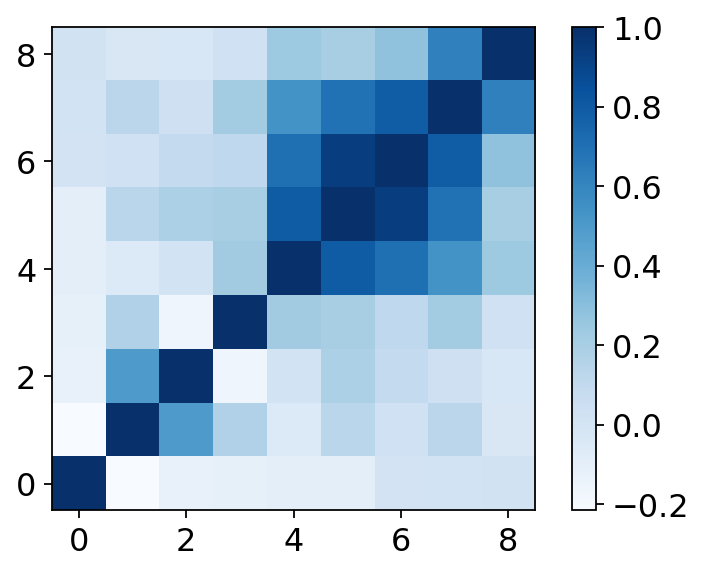

In [28]:
corr_aem = utils.reduced_covariance(cov_aem)
plt.imshow(corr_aem, origin='lower left', cmap='Blues')
plt.colorbar()

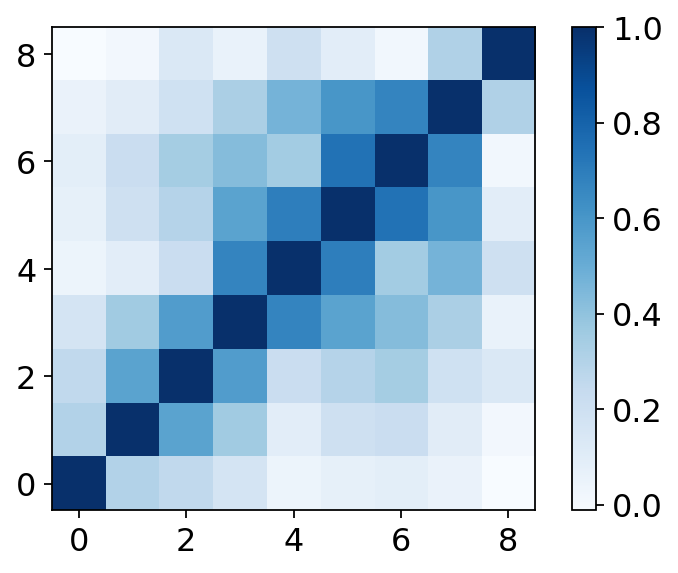

In [29]:
corr_perf = utils.reduced_covariance(cov_perf)
plt.imshow(corr_perf, origin='lower left', cmap='Blues')
plt.colorbar()

In [16]:
nbins = 9
#rbins = np.linspace(5, 45, nbins)
rbin_edges = np.logspace(np.log10(0.1), np.log10(50), nbins+1)
rbins = 10**(0.5*(np.log10(rbin_edges)[:-1] + np.log10(rbin_edges)[1:]))

var_aem = np.diag(cov_aem)
var_perf = np.diag(cov_perf)

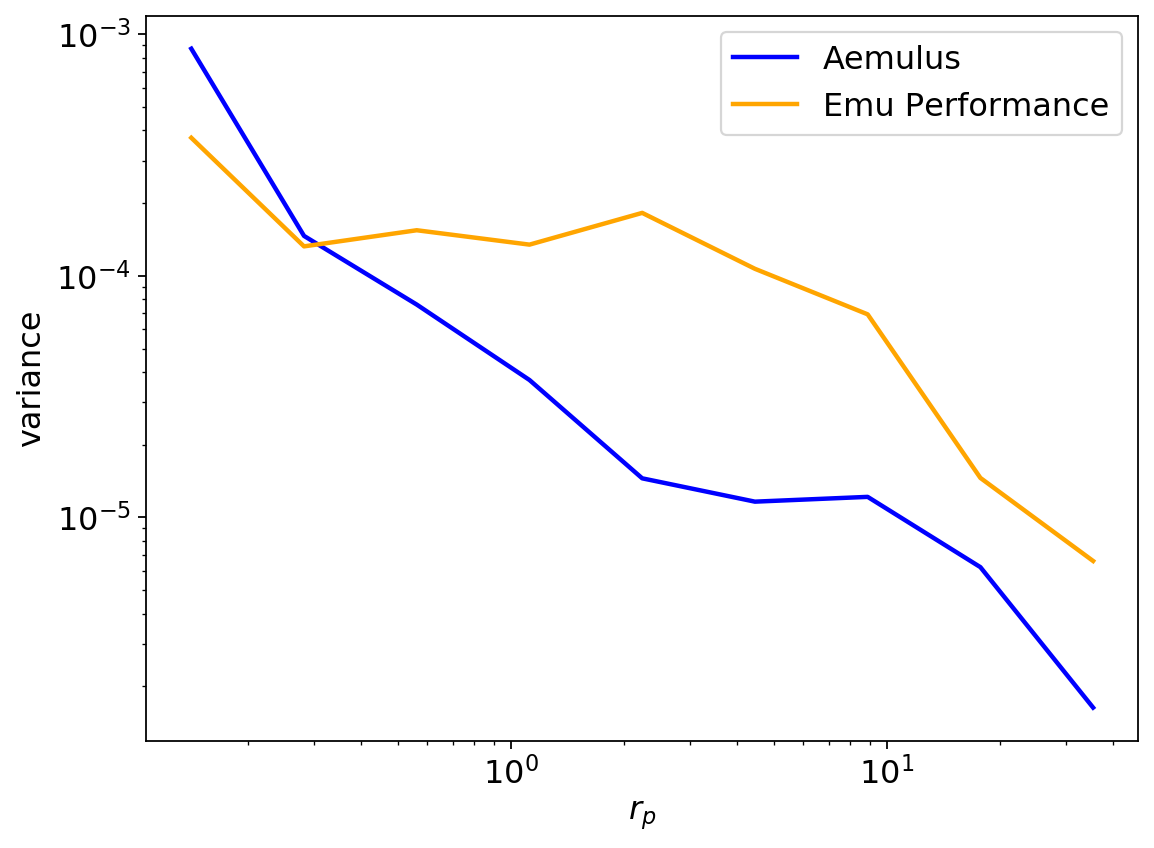

In [18]:
plt.figure(figsize=(8,6))
variances = [var_aem, var_perf]
colors = ['blue', 'orange']
labels = ['Aemulus', 'Emu Performance']

for i, var in enumerate(variances):
    plt.plot(rbins, var, color=colors[i], label=labels[i], lw=2)
    
plt.xlabel(r"$r_p$")
plt.ylabel("variance")
plt.xscale("log")
plt.yscale('log')
plt.legend()

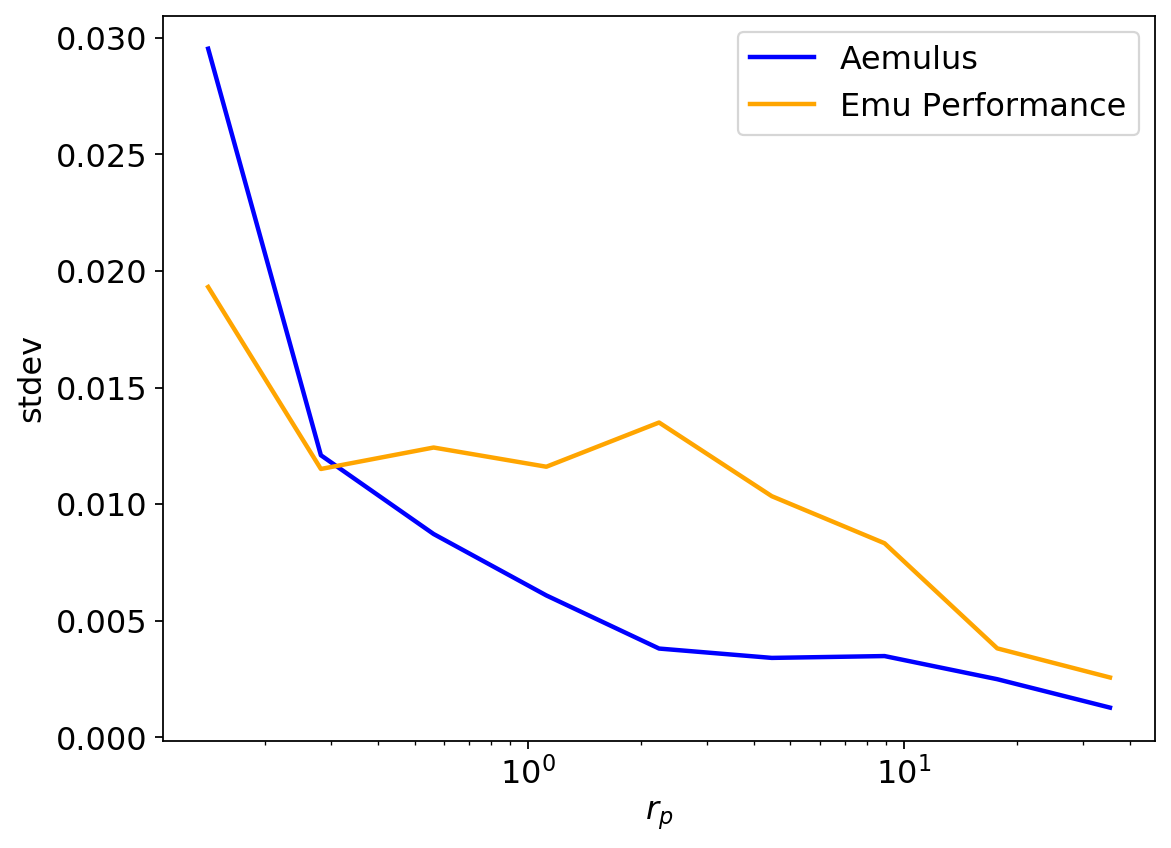

In [20]:
plt.figure(figsize=(8,6))
variances = [var_aem, var_perf]
colors = ['blue', 'orange']
labels = ['Aemulus', 'Emu Performance']

for i, var in enumerate(variances):
    plt.plot(rbins, np.sqrt(var), color=colors[i], label=labels[i], lw=2)
    
plt.xlabel(r"$r_p$")
plt.ylabel("stdev")
plt.xscale("log")
#plt.yscale('log')
plt.legend()

## Covariance with wp and UPF

In [43]:
statistics = ['wp','upf','mcf']
errtag = '_hod3_test0'
stat_str = '_'.join(statistics)

cov_dir = '../../clust/covariances'
cov_aem = np.loadtxt(f'{cov_dir}/cov_aemulus_{stat_str}{errtag}.dat')
cov_aem *= 1./5.

In [33]:
statistics = ['wp','upf','mcf']
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_hod3_test0'
tag_str = traintag + errtag + testtag

cov_fn_perf = f"{cov_dir}/cov_emuperf_{stat_str}{tag_str}.dat"
cov_perf = np.loadtxt(cov_fn_perf)

In [37]:
nbins = 9
rbin_edges_wp = np.logspace(np.log10(0.1), np.log10(50), nbins+1)
rbins_wp = 10**(0.5*(np.log10(rbin_edges_wp)[:-1] + np.log10(rbin_edges_wp)[1:]))
rbins_upf = np.linspace(5, 45, nbins)
rbins_mcf = rbins_wp
rbins = {'wp': rbins_wp, 'upf': rbins_upf, 'mcf': rbins_mcf}

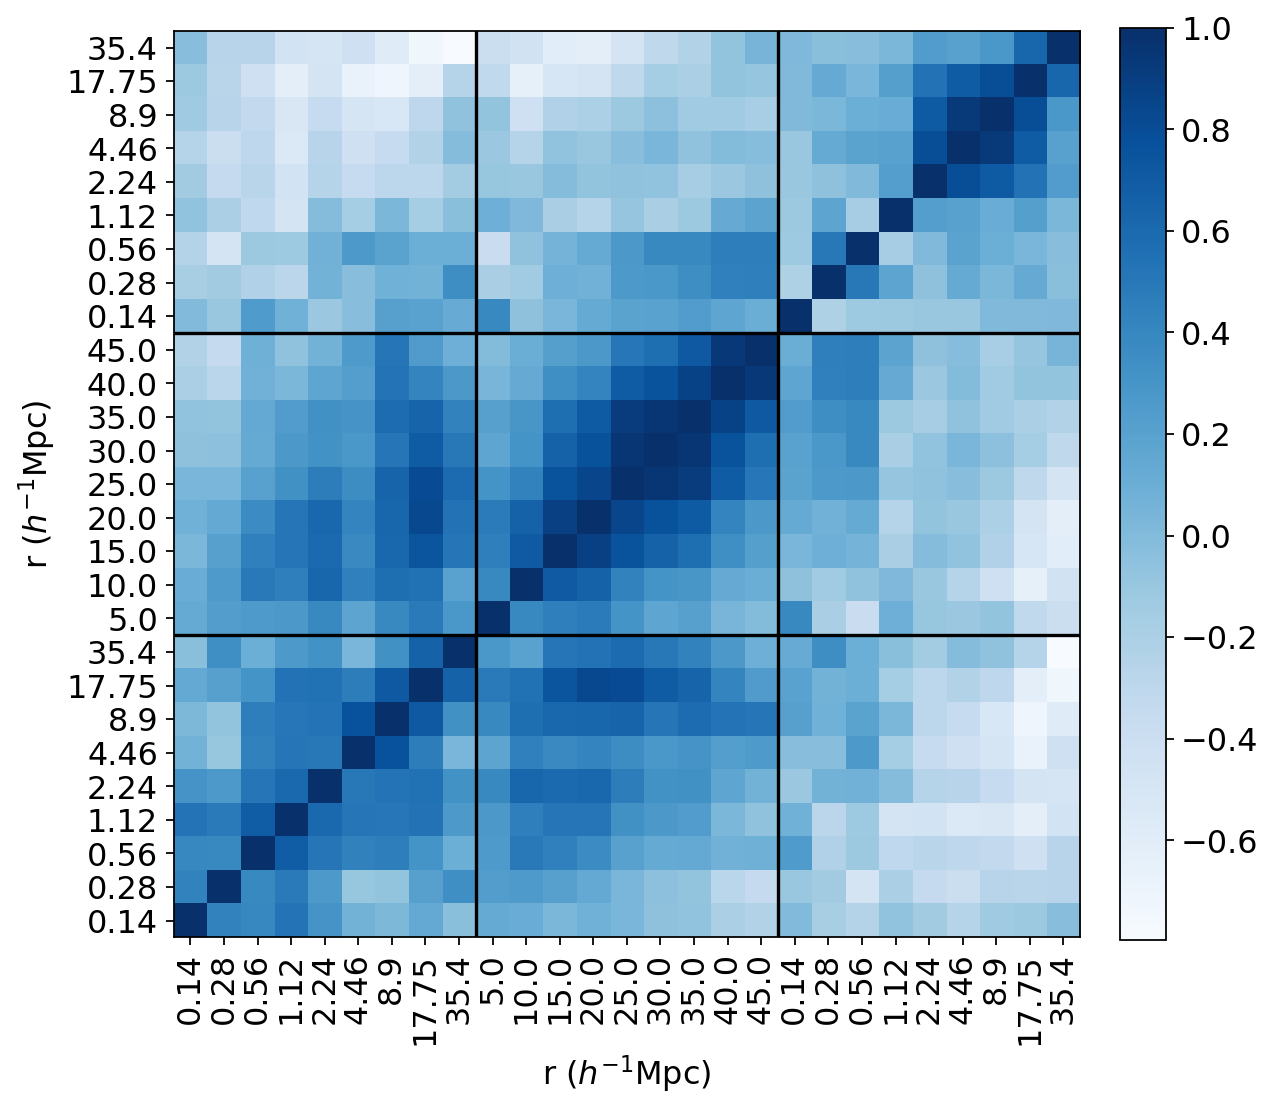

In [42]:
corr_aem = utils.reduced_covariance(cov_aem)
plt.figure(figsize=(8,8))
im = plt.imshow(corr_aem, origin='lower left', cmap='Blues')

tick_labels = np.concatenate((np.round(rbins_wp, 2), [np.int(r) for r in rbins_upf], np.round(rbins_mcf, 2)))
plt.xticks(ticks=range(len(tick_labels)), labels=tick_labels, rotation=90)
plt.yticks(ticks=range(len(tick_labels)), labels=tick_labels)
plt.axvline(8.5, color='k')
plt.axhline(8.5, color='k')
plt.axvline(17.5, color='k')
plt.axhline(17.5, color='k')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"r ($h^{-1}$Mpc)")

plt.colorbar(im, fraction=0.046, pad=0.04)

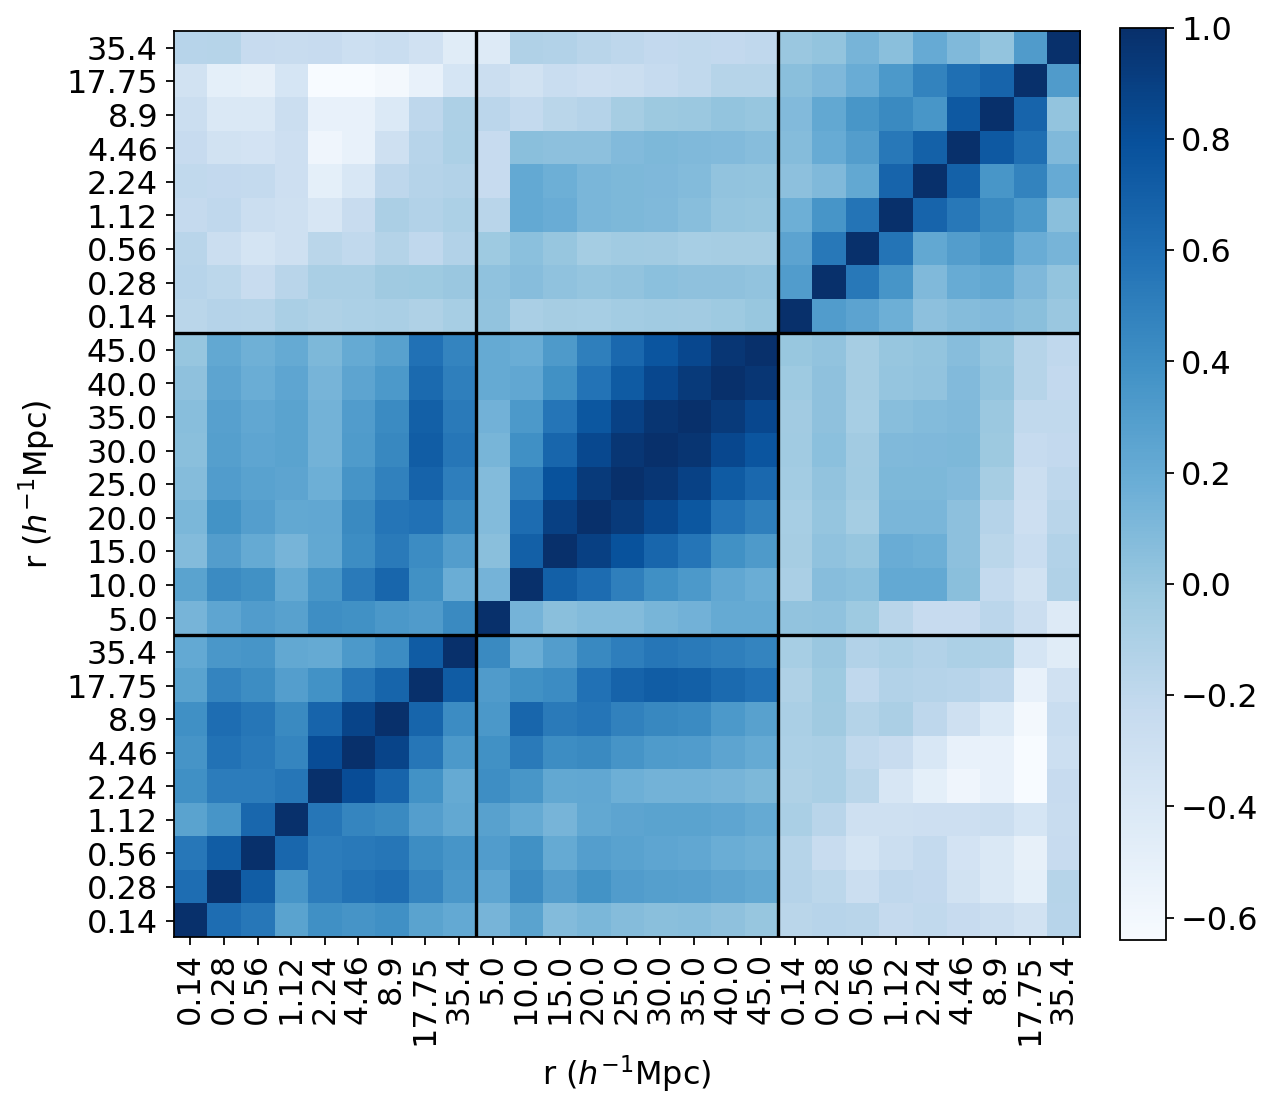

In [41]:
corr_perf = utils.reduced_covariance(cov_perf)
plt.figure(figsize=(8,8))
im = plt.imshow(corr_perf, origin='lower left', cmap='Blues')

tick_labels = np.concatenate((np.round(rbins_wp, 2), [np.int(r) for r in rbins_upf], np.round(rbins_mcf, 2)))
plt.xticks(ticks=range(len(tick_labels)), labels=tick_labels, rotation=90)
plt.yticks(ticks=range(len(tick_labels)), labels=tick_labels)
plt.axvline(8.5, color='k')
plt.axhline(8.5, color='k')
plt.axvline(17.5, color='k')
plt.axhline(17.5, color='k')
plt.xlabel(r"r ($h^{-1}$Mpc)")
plt.ylabel(r"r ($h^{-1}$Mpc)")

plt.colorbar(im, fraction=0.046, pad=0.04)